In [50]:
import nltk
import pandas as pd 
wn=nltk.WordNetLemmatizer()
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder  
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_curve, auc,confusion_matrix
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout,LSTM,GlobalAveragePooling1D
import tensorflow as tf
import numpy as np
from string import punctuation
import re


In [4]:
pd.set_option('display.max_colwidth', 100) 
df=pd.read_csv("SMSSpamCollection.txt", sep="\t", header=None)
df.columns=["label", "content"]
df.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [5]:
end_stop_words=nltk.corpus.stopwords.words("english")

def clean_email(text):
    result="".join([ch for ch in text if ch not in punctuation])
    tokens=re.split("\W", result)
    text=[word for word in tokens if word not in end_stop_words ]
    return text
df["content"]=df['content'].apply(lambda x: clean_email(x))

def lemmatizing(words):
    result=[wn.lemmatize(word) for word in words ]
    return result
df['content'] = df['content'].apply(lambda x: lemmatizing(x))
df.head()

,label,content
0,ham,"[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,"[Ok, lar, Joking, wif, u, oni]"
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"[Nah, I, dont, think, go, usf, life, around, though]"


In [6]:
df["content"]=df["content"].apply( lambda x: " ".join(x))

In [7]:
df.head()

,label,content
0,ham,Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questions...
3,ham,U dun say early hor U c already say
4,ham,Nah I dont think go usf life around though


In [8]:
df['content']=df['content'].apply(lambda x : x.lower())
df.head()

,label,content
0,ham,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...
3,ham,u dun say early hor u c already say
4,ham,nah i dont think go usf life around though


In [69]:
label = df['label'].values
content = df['content'].values
le = LabelEncoder()
y= le.fit_transform(label)
print(le.inverse_transform([0, 1]))


['ham' 'spam']


In [10]:
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(content)
X = tokenizer.texts_to_sequences(content)
X = pad_sequences(X,maxlen=200)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Embedding

In [37]:
model = Sequential()
embedding_dim = 300
model = Sequential()
model.add(Embedding(10000, embedding_dim))
# 2. Bag of Words
model.add(GlobalAveragePooling1D())
# 3. Classification
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
model2 = Sequential()
embedding_dim = 300
model2 = Sequential()
model2.add(Embedding(10000, embedding_dim))
# 2. Bag of Words
model2.add(GlobalAveragePooling1D())
# 3. Classification
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [98]:
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=8, batch_size=64)

Epoch 1/8
70/70 [==============================] - 8s 85ms/step - loss: 0.4177 - accuracy: 0.8602 - val_loss: 0.3854 - val_accuracy: 0.8587
Epoch 2/8
70/70 [==============================] - 5s 75ms/step - loss: 0.3606 - accuracy: 0.8658 - val_loss: 0.3486 - val_accuracy: 0.8587
Epoch 3/8
70/70 [==============================] - 5s 73ms/step - loss: 0.2739 - accuracy: 0.8770 - val_loss: 0.2056 - val_accuracy: 0.8777
Epoch 4/8
70/70 [==============================] - 5s 74ms/step - loss: 0.1213 - accuracy: 0.9614 - val_loss: 0.0698 - val_accuracy: 0.9674
Epoch 5/8
70/70 [==============================] - 5s 74ms/step - loss: 0.0577 - accuracy: 0.9836 - val_loss: 0.0396 - val_accuracy: 0.9973
Epoch 6/8
70/70 [==============================] - 5s 74ms/step - loss: 0.0413 - accuracy: 0.9881 - val_loss: 0.0263 - val_accuracy: 0.9946
Epoch 7/8
70/70 [==============================] - 5s 72ms/step - loss: 0.0309 - accuracy: 0.9921 - val_loss: 0.0213 - val_accuracy: 0.9973
Epoch 8/8
70/70 [===

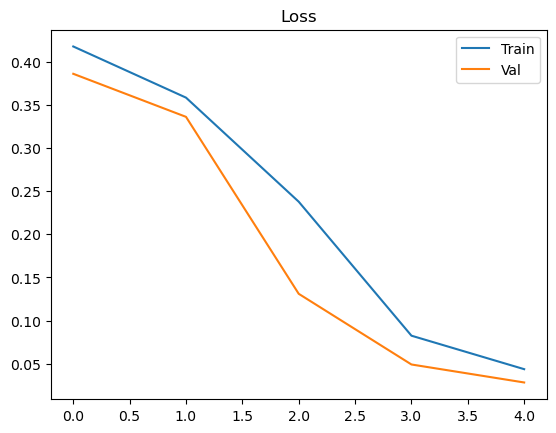

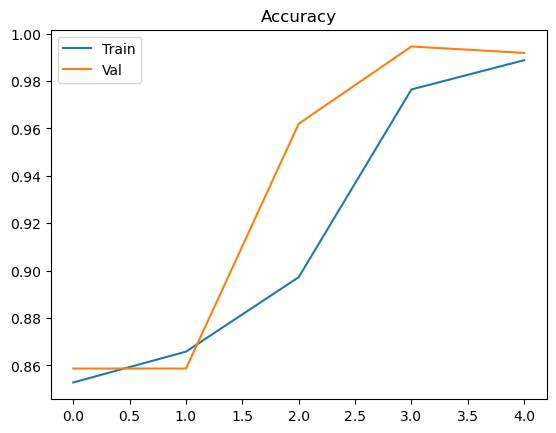

In [99]:
model_history(history)

In [60]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
70/70 [==============================] - 7s 84ms/step - loss: 0.4175 - accuracy: 0.8528 - val_loss: 0.3859 - val_accuracy: 0.8587
Epoch 2/5
70/70 [==============================] - 5s 77ms/step - loss: 0.3583 - accuracy: 0.8658 - val_loss: 0.3360 - val_accuracy: 0.8587
Epoch 3/5
70/70 [==============================] - 5s 73ms/step - loss: 0.2377 - accuracy: 0.8972 - val_loss: 0.1310 - val_accuracy: 0.9620
Epoch 4/5
70/70 [==============================] - 5s 70ms/step - loss: 0.0825 - accuracy: 0.9764 - val_loss: 0.0491 - val_accuracy: 0.9946
Epoch 5/5
70/70 [==============================] - 5s 75ms/step - loss: 0.0437 - accuracy: 0.9888 - val_loss: 0.0283 - val_accuracy: 0.9918


In [23]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=7, batch_size=64)

Epoch 1/7
56/56 [==============================] - 6s 89ms/step - loss: 0.4179 - accuracy: 0.8679 - val_loss: 0.3957 - val_accuracy: 0.8576
Epoch 2/7
56/56 [==============================] - 5s 88ms/step - loss: 0.3646 - accuracy: 0.8679 - val_loss: 0.3775 - val_accuracy: 0.8576
Epoch 3/7
56/56 [==============================] - 5s 86ms/step - loss: 0.3159 - accuracy: 0.8687 - val_loss: 0.2734 - val_accuracy: 0.8621
Epoch 4/7
56/56 [==============================] - 5s 81ms/step - loss: 0.1564 - accuracy: 0.9405 - val_loss: 0.1071 - val_accuracy: 0.9720
Epoch 5/7
56/56 [==============================] - 5s 89ms/step - loss: 0.0640 - accuracy: 0.9812 - val_loss: 0.0923 - val_accuracy: 0.9686
Epoch 6/7
56/56 [==============================] - 5s 86ms/step - loss: 0.0411 - accuracy: 0.9868 - val_loss: 0.0791 - val_accuracy: 0.9787
Epoch 7/7
56/56 [==============================] - 5s 82ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.0666 - val_accuracy: 0.9821


In [45]:
def model_history(history):
      loss_curve = history.history["loss"]
      acc_curve = history.history["accuracy"]

      loss_val_curve = history.history["val_loss"]
      acc_val_curve = history.history["val_accuracy"]

      plt.plot(loss_curve, label='Train')
      plt.plot(loss_val_curve, label='Val')
      plt.legend()
      plt.title("Loss")
      plt.show()

      plt.plot(acc_curve, label = 'Train')
      plt.plot(acc_val_curve, label = 'Val')
      plt.legend()
      plt.title("Accuracy")
      plt.show()

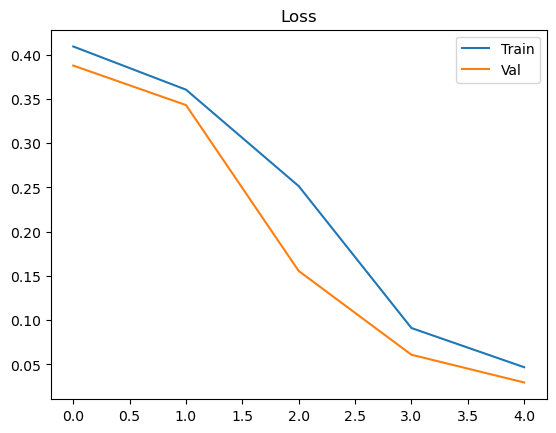

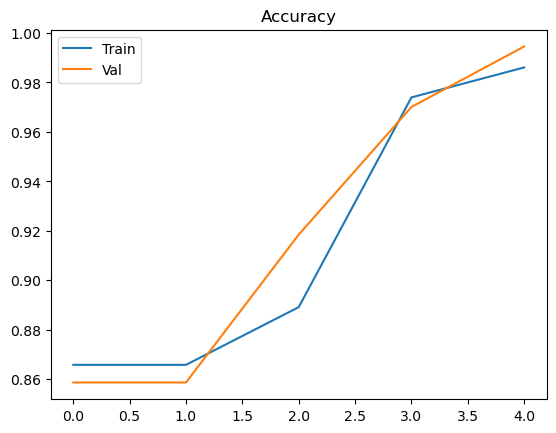

In [47]:
model_history(history) #for the first_model

In [43]:
#model.save('spam_classis_LSTM.h5')

In [25]:
#model.save('spam_classis_LSTM_2.h5')

In [102]:
#model2.save('spam_classis_LSTM_with_sigmoid.h5')

In [103]:
model1 = tf.keras.models.load_model('spam_classis_LSTM.h5')
model2 = tf.keras.models.load_model('spam_classis_LSTM_2.h5')
model_sigmoid_activation = tf.keras.models.load_model('spam_classis_LSTM_with_sigmoid.h5')

In [30]:
#SOFTMAX 

def spam_classifier(text: list,loaded_model) -> str:
    sequences = tokenizer.texts_to_sequences(text)
    seq_padded = pad_sequences(sequences, maxlen=200)
    predictions = loaded_model.predict(seq_padded)
    predicted_classes = np.argmax(predictions, axis=-1)
    #print(predictions,predicted_classes)
    
    for i in range(len(text)):
        #print(max(predictions[i])) # pour retourner la class la plus probable
        if predicted_classes[i]==0:
            print(f"{text[i]}\n NON SPAM à {round(max(predictions[i])*100,2)}% \n")
        else:
            print(f"{text[i]} :\n SPAM à {round(max(predictions[i])*100,2)}%\n")


In [84]:
#for SIGMOID 
def classifier_sentiment_sigmoid(text:list,model):
    seq = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(seq, maxlen=200)
    pred = model.predict(padded)
    for i in range(len(text)):
        if pred[i][0]>=0.5:
            print(f"SPAM {round(pred[i][0], 2)*100:.2f}%")
        else:
            print(f"HAM {round(1-pred[i][0])*100:2f}%")

In [112]:
def plot_confusion_matrix(model,cmap=plt.cm.Blues):
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    cm = confusion_matrix(y_test, y_pred)
    classes = ["0", "1"]
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
import itertools

def plot_confusion_matrix_softmax(model,cmap=plt.cm.Blues):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir les probabilités en classes prédites
    cm = confusion_matrix(y_test, y_pred_classes)
    classes = np.unique(y_test)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
    

24/24 [==============================] - 0s 6ms/step


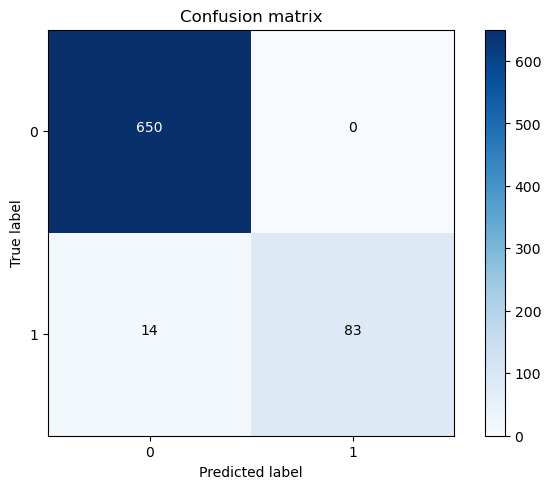

In [114]:
plot_confusion_matrix_softmax(model2,cmap=plt.cm.Blues)

24/24 [==============================] - 0s 6ms/step


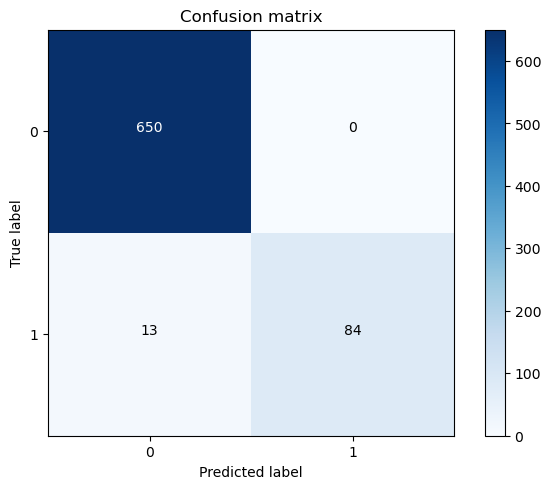

In [113]:
plot_confusion_matrix_softmax(model1,cmap=plt.cm.Blues)

24/24 [==============================] - 0s 7ms/step


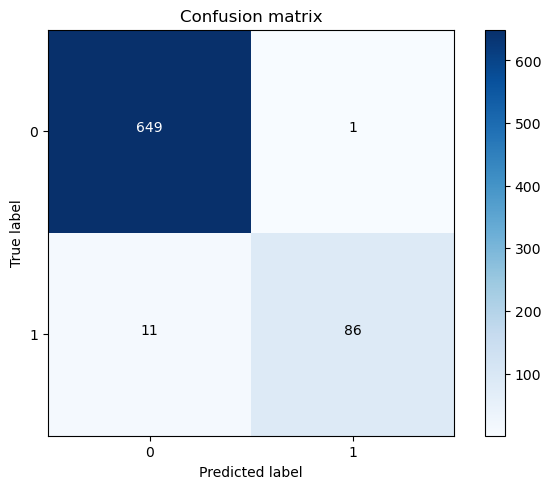

In [109]:
plot_confusion_matrix(model_sigmoid_activation,cmap=plt.cm.Blues)

In [31]:
textes_spam = [
    "Congratulations! You've won a free trip to Hawaii! Click on this link to claim your prize.",
    "You have been pre-approved for a loan of $10,000. Apply now to get the money you need.",
    "Urgent: Your account has been suspended. Click on this link to verify your identity and reactivate your account.",
    "You have been selected to receive a free iPhone. Claim your prize by clicking on this link.",
    "Congratulations! You are the winner of a $1,000 Amazon gift card. Click on this link to claim your prize.",
    "You've been selected to participate in our exclusive survey. Complete the survey to win a prize.",
    "Limited time offer: Get 50% off your next purchase. Use this coupon code at checkout.",
    "You have been selected to receive a free trial of our premium service. Click on this link to sign up now.",
    "Nah I dont think go usf life around though	",
]


messages_non_spam = [
    "Hi there! Just wanted to check in and see how you're doing.",
    "Reminder: Our team meeting is scheduled for tomorrow at 10 am. Looking forward to seeing you there!",
    "Congratulations on your recent promotion. Well deserved!",
    "Hey, can you send me the report you mentioned earlier? Thanks!",
    "Thanks for your help with the project. Let's catch up over coffee sometime!",
    "Don't forget to submit your time sheet for this week by end of day today.",
    "I'm sorry to hear that you're not feeling well. Let me know if there's anything I can do to help.",
    "Great job on the presentation. Your hard work really paid off!",
    "Can you please confirm the time and location of our meeting tomorrow? Thanks!",
    "Thanks for the invitation to your party. Looking forward to seeing you there!"
]

In [32]:
spam_classifier(textes_spam,model2)

1/1 [==============================] - 0s 139ms/step
Congratulations! You've won a free trip to Hawaii! Click on this link to claim your prize. :
 SPAM à 99.74%

You have been pre-approved for a loan of $10,000. Apply now to get the money you need. :
 SPAM à 89.24%

Urgent: Your account has been suspended. Click on this link to verify your identity and reactivate your account. :
 SPAM à 96.46%

You have been selected to receive a free iPhone. Claim your prize by clicking on this link. :
 SPAM à 99.63%

Congratulations! You are the winner of a $1,000 Amazon gift card. Click on this link to claim your prize. :
 SPAM à 99.62%

You've been selected to participate in our exclusive survey. Complete the survey to win a prize. :
 SPAM à 91.64%

Limited time offer: Get 50% off your next purchase. Use this coupon code at checkout.
 NON SPAM à 53.82% 

You have been selected to receive a free trial of our premium service. Click on this link to sign up now. :
 SPAM à 99.57%

Nah I dont think go us

In [33]:
spam_classifier(messages_non_spam,model2)

1/1 [==============================] - 0s 49ms/step
Hi there! Just wanted to check in and see how you're doing.
 NON SPAM à 98.73% 

Reminder: Our team meeting is scheduled for tomorrow at 10 am. Looking forward to seeing you there!
 NON SPAM à 97.99% 

Congratulations on your recent promotion. Well deserved!
 NON SPAM à 90.5% 

Hey, can you send me the report you mentioned earlier? Thanks!
 NON SPAM à 94.43% 

Thanks for your help with the project. Let's catch up over coffee sometime!
 NON SPAM à 80.72% 

Don't forget to submit your time sheet for this week by end of day today. :
 SPAM à 51.88%

I'm sorry to hear that you're not feeling well. Let me know if there's anything I can do to help.
 NON SPAM à 99.91% 

Great job on the presentation. Your hard work really paid off!
 NON SPAM à 99.45% 

Can you please confirm the time and location of our meeting tomorrow? Thanks!
 NON SPAM à 98.99% 

Thanks for the invitation to your party. Looking forward to seeing you there! :
 SPAM à 84.78%

In [104]:
classifier_sentiment_sigmoid(messages_non_spam,model_sigmoid_activation)

1/1 [==============================] - 0s 127ms/step
HAM 100.000000%
HAM 100.000000%
HAM 100.000000%
HAM 100.000000%
HAM 100.000000%
SPAM 92.00%
HAM 100.000000%
HAM 100.000000%
HAM 100.000000%
SPAM 93.00%


In [105]:
classifier_sentiment_sigmoid(textes_spam,model_sigmoid_activation)

1/1 [==============================] - 0s 24ms/step
SPAM 100.00%
SPAM 98.00%
SPAM 99.00%
SPAM 100.00%
SPAM 100.00%
SPAM 96.00%
SPAM 73.00%
SPAM 100.00%
HAM 100.000000%
